In [137]:
import cv2
import celluloid
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt
from numpy import sin, cos, tan, pi, tanh, sqrt

In [138]:
# Perlin noise stuff

def perlin(x,y,seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256,dtype=int)
    np.random.shuffle(p)
    p = np.stack([p,p]).flatten()
    # coordinates of the top-left
    xi = x.astype(int)
    yi = y.astype(int)
    # internal coordinates
    xf = x - xi
    yf = y - yi
    # fade factors
    u = fade(xf)
    v = fade(yf)
    # noise components
    n00 = gradient(p[p[xi]+yi],xf,yf)
    n01 = gradient(p[p[xi]+yi+1],xf,yf-1)
    n11 = gradient(p[p[xi+1]+yi+1],xf-1,yf-1)
    n10 = gradient(p[p[xi+1]+yi],xf-1,yf)
    # combine noises
    x1 = lerp(n00,n10,u)
    x2 = lerp(n01,n11,u) # FIX1: I was using n10 instead of n01
    return lerp(x1,x2,v) # FIX2: I also had to reverse x1 and x2 here

def lerp(a,b,x):
    "linear interpolation"
    return a + x * (b-a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

In [139]:
# Animation stuff

def plot(y):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(y)
    plt.show()
    
def make_animation(x, y_fn):
    fig = plt.figure(figsize=(10,10))
    camera = celluloid.Camera(fig)
    
    for t in np.linspace(0, 2*pi, 100):
        y = y_fn(x, t)
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(y, cmap='coolwarm')
        camera.snap()
    
    return camera.animate()

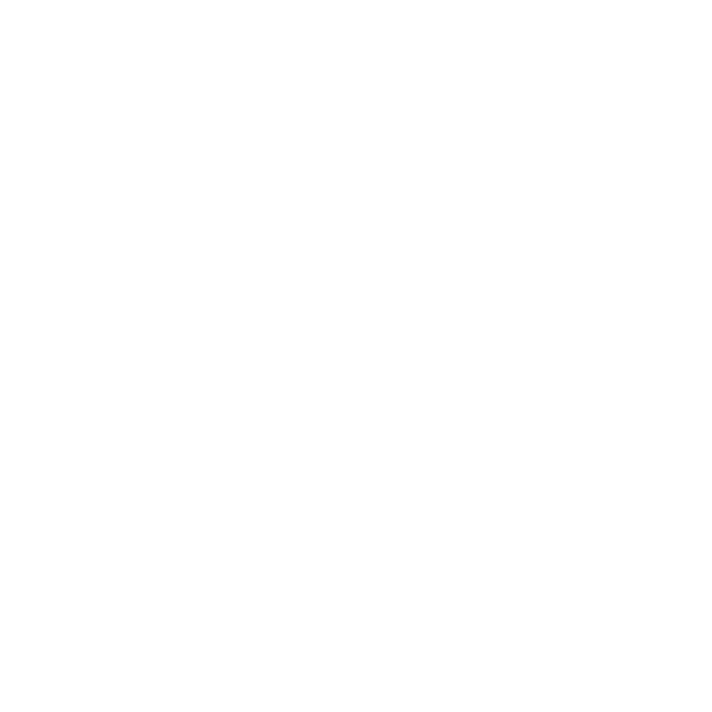

In [135]:
N = 200
x = np.array([(i,j) for i in range(N) for j in range(N)]).reshape((N,N,2)) / N

def y_fn_1(x, t):
    scale = (1+10*(1+cos(t)))
    x_ = scale*x
    x1, x2 = x_[:, :, 0], x_[:, :, 1]
    y = tanh(
        .1*sqrt((x1-.5*scale)**2 + (x2-.5*scale)**2) * cos(x1 + 2*t) * sin(x2 - 2*t) + 1.2*perlin(x1, x2)
    )
    y = (y-np.min(y))/(np.max(y)-np.min(y))
    y = (y > .5).astype(float)
    y = cv2.blur(y, (3,3))
    return y

animation = make_animation(x, y_fn_1)
HTML(animation.to_html5_video())

In [136]:
animation.save('y_fn_1-2.mp4')